In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
 
def preprocess(filename):
    """Preprocess NCDC weather data"""

    fields = ['STN', 'WBAN', 'YEARMODA', 'TEMP', 'TEMP_count', 'DEWP', 'DEWP_count', 'SLP', 'SLP_count', 'STP', 'STP_count', 'VISIB', 'VISIB_count', 'WDSP', 'WDSP_count', 'MXSPD', 'GUST', 'MAX', 'MIN', 'PRCP', 'SNDP', 'FRSHTT']
     
    df = pd.read_csv(filename, 
                  sep=r'\s+', 
                  names=fields, 
                  header=0, 
                  parse_dates=['YEARMODA'], 
                  na_values={'TEMP':[9999.9], 
                             'DEWP':[9999.9], 
                             'SLP':[9999.9], 
                             'STP':[9999.9], 
                             'VISIB':[999.9], 
                             'WDSP':[999.9], 
                             'MXSPD':[999.9], 
                             'GUST':[999.9], 
                             'MAX':['9999.9'], # doesn't matter whether float or str
                             'MIN':['9999.9'], 
                             'PRCP':['99.99'],
                             'SNDP':[999.9]}
                 )
    flagged = df.copy()
 
    def strip_flag(x):
        if type(x) is float:
            return x
        elif type(x) is str:
            return float(x[:-1]) if '*' in x else float(x)
    def extract_flag(x):
        if type(x) is float:
            return False
        elif type(x) is str:
            return True if '*' in x else False
     
    flagged['MAX'] = df['MAX'].map(strip_flag)
    flagged['MAX_flag'] = df['MAX'].map(extract_flag)
    flagged['MIN'] = df['MIN'].map(strip_flag)
    flagged['MIN_flag'] = df['MIN'].map(extract_flag)
     
    flagged['PRCP'] = df['PRCP'].map(lambda x: float(x[:-1]) if type(x) is str else x)
    PRCP_flag = df['PRCP'].map(lambda x: x[-1] if type(x) is str else x)
    PRCP_dummies = pd.get_dummies(PRCP_flag).add_prefix('PRCP_')
    preprocessed = flagged.join(PRCP_dummies)
     
    return preprocessed


In [3]:
print ("processing 1...")
df1 = preprocess('CA_1981-1985.txt')
print ("processing 2...")
df2 = preprocess('CA_1985-1989.txt')
print ("processing 3...")
df3 = preprocess('CA_1989-1993.txt')
print ("processing 4...")
df4 = preprocess('CA_1993-1997.txt')
print ("processing 5...")
df5 = preprocess('CA_1997-2001.txt')
print ("processing 6...")
df6 = preprocess('CA_2001-2005.txt')
print ("processing 7...")
df7 = preprocess('CA_2005-2009.txt')
print ("processing 8...")
df8 = preprocess('CA_2009-2015.txt')

processing 1...
processing 2...
processing 3...
processing 4...
processing 5...
processing 6...
processing 7...
processing 8...


In [38]:
frames = [ df1, df2, df3, df4, df5, df6, df7, df8]
df = pd.concat(frames)
df_processed = df[['STN','YEARMODA', 'TEMP', 'DEWP', 'PRCP']].dropna(axis=0)
data = df_processed.values
df.head()
df_processed.head()


,STN,YEARMODA,TEMP,DEWP,PRCP
17,691414,1985-05-11,45.0,42.9,0.00
20,691414,1985-05-14,47.5,47.1,0.08
21,691414,1985-05-15,53.4,49.7,0.00
22,691414,1985-05-16,56.4,53.7,0.00
23,691414,1985-05-17,55.6,52.4,0.00


In [54]:
df2 = df_processed.set_index('YEARMODA')
def subset(df):
    df2= df.resample('W')
    return df2[df2.index.month == 11]
df2 = df2.groupby('STN').apply(subset)
# df2 = df2.resample('W')
df2

STN       TEMP       DEWP   PRCP
STN    YEARMODA                                       
690020 1990-11-04  690020  61.180000  33.420000  0.000
       1990-11-11  690020  62.600000  20.675000  0.000
       1990-11-18  690020  60.900000  33.150000  0.000
       1990-11-25  690020  57.650000  38.100000  0.000
       1991-11-03  690020  60.720000  28.700000  0.000
       1991-11-10  690020  72.140000  36.240000  0.000
       1991-11-17  690020  62.700000  31.050000  0.000
       1991-11-24  690020  58.940000  35.100000  0.000
       1992-11-01  690020  64.540000  54.380000  0.212
       1992-11-08  690020  68.820000  40.760000  0.000
       1992-11-15  690020  61.875000  23.675000  0.000
       1992-11-22  690020  59.000000  32.240000  0.000
       1992-11-29  690020  53.333333  30.366667  0.000
       1993-11-07  690020  77.200000  33.100000  0.000
       1993-11-14  690020  60.600000  41.433333  0.000
       1993-11-21  690020  55.920000  36.340000  0.000
       1993-11-28  690020  54.650000  33.425000  0.000
       1994-11-06  690020  59.340000  24.740000  0.000
       1994-11-13  690020  50.060000  44.980000  0.112
       1994-11-20  690020  47.420000  35.120000  0.056
       1994-11-27  690020  48.660000  37.820000  0.032
       1995-11-05  690020  60.400000  50.575000  0.050
       1995-11-12  690020  65.650000  39.750000  0.000
       1995-11-19  690020  68.800000  44.700000  0.000
       1995-11-26  690020  61.800000  40.233333  0.000
       1996-11-03     NaN        NaN        NaN    NaN
       1996-11-10     NaN        NaN        NaN    NaN
       1996-11-17     NaN        NaN        NaN    NaN
       1996-11-24     NaN        NaN        NaN    NaN
690070 1991-11-03     NaN        NaN        NaN    NaN
...                   ...        ...        ...    ...
999999 2008-11-16     NaN        NaN        NaN    NaN
       2008-11-23     NaN        NaN        NaN    NaN
       2008-11-30     NaN        NaN        NaN    NaN
       2009-11-01     NaN        NaN        NaN    NaN
       2009-11-08     NaN        NaN        NaN    NaN
       2009-11-15     NaN        NaN        NaN    NaN
       2009-11-22     NaN        NaN        NaN    NaN
       2009-11-29     NaN        NaN        NaN    NaN
       2010-11-07     NaN        NaN        NaN    NaN
       2010-11-14     NaN        NaN        NaN    NaN
       2010-11-21     NaN        NaN        NaN    NaN
       2010-11-28     NaN        NaN        NaN    NaN
       2011-11-06     NaN        NaN        NaN    NaN
       2011-11-13     NaN        NaN        NaN    NaN
       2011-11-20     NaN        NaN        NaN    NaN
       2011-11-27     NaN        NaN        NaN    NaN
       2012-11-04     NaN        NaN        NaN    NaN
       2012-11-11     NaN        NaN        NaN    NaN
       2012-11-18     NaN        NaN        NaN    NaN
       2012-11-25     NaN        NaN        NaN    NaN
       2013-11-03     NaN        NaN        NaN    NaN
       2013-11-10     NaN        NaN        NaN    NaN
       2013-11-17     NaN        NaN        NaN    NaN
       2013-11-24     NaN        NaN        NaN    NaN
       2014-11-02  999999  63.616667  44.416667  0.000
       2014-11-09  999999  65.528571  36.242857  0.000
       2014-11-16  999999  59.807692  46.076923  0.000
       2014-11-23  999999  60.200000  28.960000  0.000
       2014-11-30  999999  60.945455  27.681818  0.000
       2015-11-01  999999  69.869231  40.361538  0.000

[16262 rows x 4 columns]

In [55]:
df2.dropna(axis=0)

STN       TEMP       DEWP      PRCP
STN    YEARMODA                                          
690020 1990-11-04  690020  61.180000  33.420000  0.000000
       1990-11-11  690020  62.600000  20.675000  0.000000
       1990-11-18  690020  60.900000  33.150000  0.000000
       1990-11-25  690020  57.650000  38.100000  0.000000
       1991-11-03  690020  60.720000  28.700000  0.000000
       1991-11-10  690020  72.140000  36.240000  0.000000
       1991-11-17  690020  62.700000  31.050000  0.000000
       1991-11-24  690020  58.940000  35.100000  0.000000
       1992-11-01  690020  64.540000  54.380000  0.212000
       1992-11-08  690020  68.820000  40.760000  0.000000
       1992-11-15  690020  61.875000  23.675000  0.000000
       1992-11-22  690020  59.000000  32.240000  0.000000
       1992-11-29  690020  53.333333  30.366667  0.000000
       1993-11-07  690020  77.200000  33.100000  0.000000
       1993-11-14  690020  60.600000  41.433333  0.000000
       1993-11-21  690020  55.920000  36.340000  0.000000
       1993-11-28  690020  54.650000  33.425000  0.000000
       1994-11-06  690020  59.340000  24.740000  0.000000
       1994-11-13  690020  50.060000  44.980000  0.112000
       1994-11-20  690020  47.420000  35.120000  0.056000
       1994-11-27  690020  48.660000  37.820000  0.032000
       1995-11-05  690020  60.400000  50.575000  0.050000
       1995-11-12  690020  65.650000  39.750000  0.000000
       1995-11-19  690020  68.800000  44.700000  0.000000
       1995-11-26  690020  61.800000  40.233333  0.000000
690070 1992-11-01  690070  61.140000  55.660000  0.016000
       1992-11-08  690070  59.620000  50.240000  0.000000
       1992-11-15  690070  52.100000  33.320000  0.000000
       1992-11-22  690070  53.920000  48.720000  0.008000
       1992-11-29  690070  49.833333  35.666667  0.000000
...                   ...        ...        ...       ...
999999 1981-11-15  999999  61.650000  50.721429  0.000000
       1981-11-22  999999  60.376923  47.469231  0.000000
       1981-11-29  999999  56.960000  50.600000  0.000000
       1982-11-07  999999  63.157143  34.507143  0.000000
       1982-11-14  999999  56.600000  38.442857  0.000000
       1982-11-21  999999  57.618182  44.918182  0.000000
       1982-11-28  999999  58.400000  39.684615  0.000000
       1983-11-06  999999  67.145455  53.190909  0.000000
       1983-11-13  999999  63.666667  49.622222  0.000000
       1983-11-20  999999  60.971429  47.071429  0.000000
       1983-11-27  999999  52.630000  33.910000  0.000000
       1984-11-04  999999  61.392308  50.015385  0.000000
       1984-11-11  999999  60.490909  47.681818  0.000000
       1984-11-18  999999  58.266667  47.133333  0.000000
       1984-11-25  999999  57.300000  40.500000  0.000000
       1985-11-03  999999  63.433333  54.755556  0.000000
       1999-11-07  999999  62.685714  52.228571  0.000000
       1999-11-14  999999  60.266667  52.066667  0.000000
       1999-11-21  999999  60.383333  52.116667  0.000000
       1999-11-28  999999  58.285714  35.371429  0.000000
       2005-11-06  999999  63.793333  39.080000  0.000000
       2005-11-13  999999  57.808333  46.441667  0.007500
       2005-11-20  999999  65.750000  28.414286  0.000000
       2005-11-27  999999  60.464286  33.221429  0.000714
       2014-11-02  999999  63.616667  44.416667  0.000000
       2014-11-09  999999  65.528571  36.242857  0.000000
       2014-11-16  999999  59.807692  46.076923  0.000000
       2014-11-23  999999  60.200000  28.960000  0.000000
       2014-11-30  999999  60.945455  27.681818  0.000000
       2015-11-01  999999  69.869231  40.361538  0.000000

[13183 rows x 4 columns]

In [13]:
pca = PCA(n_components=3) # Want to keep 2 components for 3 dimentional data
pca.fit(data_normed)
pca.components_
print(pca.explained_variance_ratio_)


[  7.33654332e-01   2.66256328e-01   8.93404377e-05]


In [17]:
first_pc = pca.components_[0]
second_pc = pca.components_[1]
third_pc = pca.components_[2]
# the eigenvalues
print (pca.explained_variance_ratio_)
print (first_pc)
print (second_pc)
print (third_pc)

[  7.33654332e-01   2.66256328e-01   8.93404377e-05]
[ 0.75507721  0.6556353  -0.00087453]
[-0.6556316   0.75507643  0.00260388]
[ 0.00236753 -0.00139276  0.99999623]


In [20]:
transformed_data = pca.transform(data_normed)
print (transformed_data)
transformed_data[:10]

[[ -1.60515851e-04   1.14305849e-04  -7.64763877e-07]
 [ -1.05941171e-04   1.32325184e-04   1.76727790e-07]
 [ -3.35125308e-05   1.09922443e-04  -6.42281069e-07]
 ..., 
 [ -5.11247304e-05  -2.90571667e-04   3.85158621e-07]
 [ -3.05217066e-05  -2.39942057e-04   2.71342814e-07]
 [  2.54569431e-05  -2.41830564e-04   3.25215590e-07]]


array([[ -1.60515851e-04,   1.14305849e-04,  -7.64763877e-07],
       [ -1.05941171e-04,   1.32325184e-04,   1.76727790e-07],
       [ -3.35125308e-05,   1.09922443e-04,  -6.42281069e-07],
       [  2.39604053e-05,   1.22308988e-04,  -6.24272136e-07],
       [  6.83545339e-06,   1.16934242e-04,  -6.25253272e-07],
       [  2.37852920e-04,   1.03212813e-04,  -3.87491229e-07],
       [  2.47290360e-04,   1.23048874e-04,  -4.30888755e-07],
       [  1.70377929e-04,  -2.16611475e-04,   3.86286423e-07],
       [  7.27094925e-05,  -7.26305818e-05,  -7.40383418e-08],
       [  7.94140007e-05,  -6.13222984e-05,  -9.76205257e-08]])

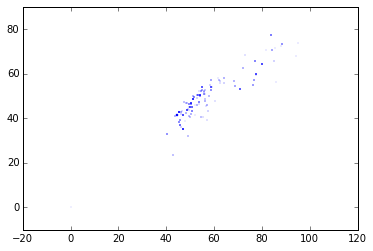

In [23]:
for ii, jj in zip(transformed_data[:1000],data[:1000]):
    plt.scatter(first_pc[0]*ii[0], first_pc[1]*ii[0], first_pc[2]*ii[0], color="r")
    plt.scatter(second_pc[0]*ii[1], second_pc[1]*ii[1], second_pc[2]*ii[1], color="c")
    plt.scatter(third_pc[0]*ii[2], third_pc[1]*ii[2], third_pc[2]*ii[2], color="b")
    plt.scatter( jj[0], jj[1], jj[2], color="b")